In [151]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # We want to suppress warnings
warnings.filterwarnings('ignore')
import pandas_profiling
from datetime import datetime as dt
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [152]:
## Read CSV file into variable
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [153]:
data.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [154]:
print("Number of rows in the  dataset ",data.shape[0])
print("Number of columns in the  dataset ",data.shape[1])

Number of rows in the  dataset  1470
Number of columns in the  dataset  35


#### Whether Imbalanced or Not ???

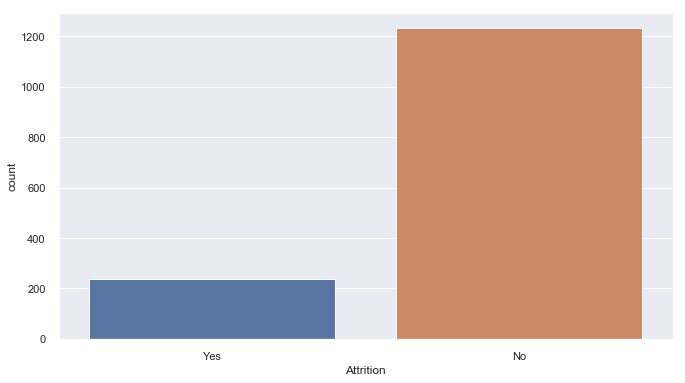

In [155]:
sns.set(rc={'figure.figsize': (11,6)})
sns.countplot(data.Attrition)

In [156]:
pandas_profiling.ProfileReport(data)

In [ ]:
profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="IBM_HR_Analytics.html")

In [99]:
# Drop useless features as per above report
data = data.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18','MonthlyIncome'
                        ])

#### Converting attrition to int

In [100]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [101]:
data['Attrition'].replace('No',0, inplace=True)
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [102]:
X = data.drop(['Attrition'],axis=1)
y = data['Attrition']

#### Finding the categorical columns

In [103]:
categorical = []
for column in X:
    if X[column].dtype == 'object':
        categorical.append(column)
categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [104]:
X['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [105]:
X['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
X['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
X['BusinessTravel'].replace('Non-Travel',3, inplace=True)

In [106]:
X['BusinessTravel'].value_counts()

1    1043
2     277
3     150
Name: BusinessTravel, dtype: int64

In [107]:
X['Gender'].replace('Male',1, inplace=True)
X['Gender'].replace('Female',0, inplace=True)
X['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [108]:
X.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [109]:
X['Department'].replace('Sales',1, inplace=True)
X['Department'].replace('Research & Development',2, inplace=True)
X['Department'].replace('Human Resources',3, inplace=True)
X['Department'].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [110]:
X.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [111]:
X['EducationField'].replace('Life Sciences',1, inplace=True)
X['EducationField'].replace('Medical',2, inplace=True)
X['EducationField'].replace('Marketing',3, inplace=True)
X['EducationField'].replace('Technical Degree',4, inplace=True)
X['EducationField'].replace('Human Resources',5, inplace=True)
X['EducationField'].replace('Other',6, inplace=True)
X['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [112]:
X.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [113]:
X['JobRole'].replace('Sales Executive',1, inplace=True)
X['JobRole'].replace('Human Resources',2, inplace=True)
X['JobRole'].replace('Research Scientist',3, inplace=True)
X['JobRole'].replace('Laboratory Technician',4, inplace=True)
X['JobRole'].replace('Manufacturing Director',5, inplace=True)
X['JobRole'].replace('Healthcare Representative',6, inplace=True)
X['JobRole'].replace('Manager',7, inplace=True)
X['JobRole'].replace('Sales Representative',8, inplace=True)
X['JobRole'].replace('Research Director',9, inplace=True)
X['EducationField'].value_counts()

1    606
2    464
3    159
4    132
6     82
5     27
Name: EducationField, dtype: int64

In [114]:
X.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [115]:
X['MaritalStatus'].replace('Single',1, inplace=True)
X['MaritalStatus'].replace('Married',2, inplace=True)
X['MaritalStatus'].replace('Divorced',3, inplace=True)
X['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [116]:
X.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [117]:
X['OverTime'].replace('Yes',1, inplace=True)
X['OverTime'].replace('No',2, inplace=True)
X['OverTime'].value_counts()

2    1054
1     416
Name: OverTime, dtype: int64

In [118]:
X['OverTime'].replace('Yes',1, inplace=True)
X['OverTime'].replace('No',2, inplace=True)
X['OverTime'].value_counts()

2    1054
1     416
Name: OverTime, dtype: int64

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1

#### Creating train test data

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1210,stratify=y)

### Visualization using TSNE

In [121]:
from sklearn.manifold import TSNE
def tsne(dataset, labels, perplexity):
    labels=labels.apply(lambda x: 'Attrition' if x==1 else 'No Attrition')    
    #Starting TSNE dataset transform
    model = TSNE(n_components=2, init='random', random_state=1230, verbose=1, angle=0.5, method='barnes_hut', perplexity=perplexity, n_iter=2000)
    tsne_data = model.fit_transform(dataset)

    #Creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Label Type"))
    
    #Info
    print("\nT-SNE Plot for perplexity = {}".format(perplexity))
    
    # Ploting the result of tsne
    sns.FacetGrid(tsne_df, hue="Label Type", height=6).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
    plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1029 samples in 0.003s...
[t-SNE] Computed neighbors for 1029 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1029
[t-SNE] Computed conditional probabilities for sample 1029 / 1029
[t-SNE] Mean sigma: 223.098931
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.748001
[t-SNE] KL divergence after 1550 iterations: 0.231396

T-SNE Plot for perplexity = 100


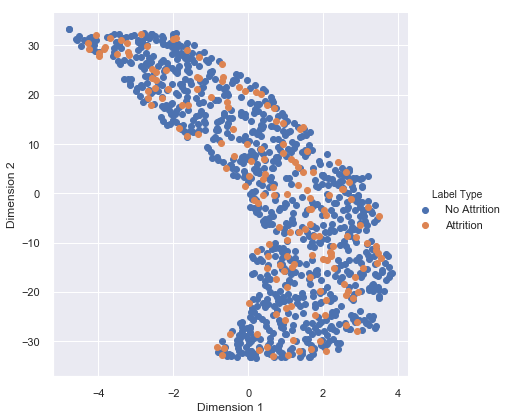

Time taken to complete random search:  0:00:30.811883


In [122]:
st=dt.now()
tsne(X_train, y_train, 100)
print("Time taken to complete random search: ",dt.now()-st)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 1029 samples in 0.000s...
[t-SNE] Computed neighbors for 1029 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1029
[t-SNE] Computed conditional probabilities for sample 1029 / 1029
[t-SNE] Mean sigma: 226.728026
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.782795
[t-SNE] KL divergence after 1200 iterations: 0.145222

T-SNE Plot for perplexity = 200


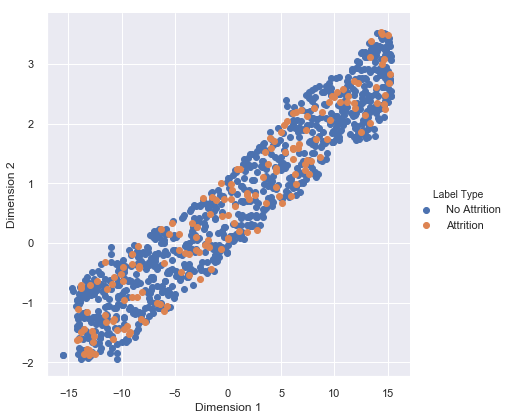

Time taken to complete random search:  0:00:33.663817


In [123]:
st=dt.now()
tsne(X_train, y_train, 200)
print("Time taken to complete random search: ",dt.now()-st)

[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 1029 samples in 0.001s...
[t-SNE] Computed neighbors for 1029 samples in 0.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1029
[t-SNE] Computed conditional probabilities for sample 1029 / 1029
[t-SNE] Mean sigma: 227.376546
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.559540
[t-SNE] KL divergence after 1400 iterations: 0.128474

T-SNE Plot for perplexity = 250


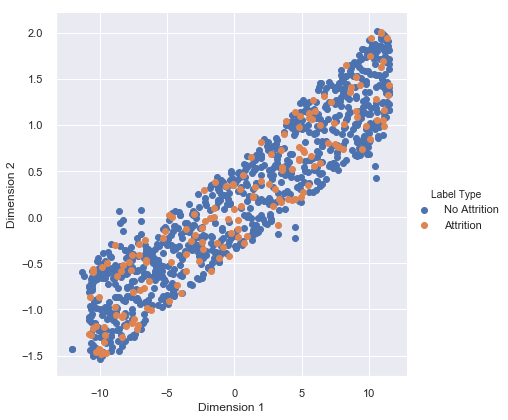

Time taken to complete random search:  0:00:50.018653


In [124]:
st=dt.now()
tsne(X_train, y_train, 250)
print("Time taken to complete random search: ",dt.now()-st)

Shape of the Data Matrix before reducing dimension:  (1029, 30)
Shape of the Data Matrix after reducing dimension:  (1029, 2)


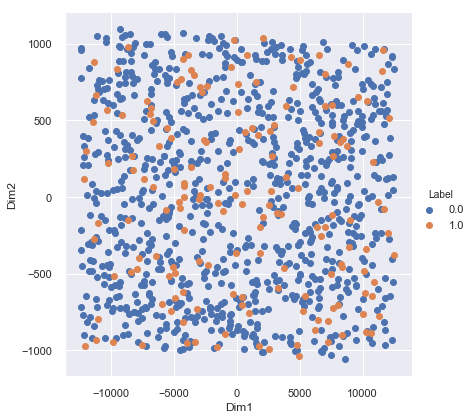

In [125]:
#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("Dim1", "Dim2", "Label"))
sns.FacetGrid(pca_df, hue="Label", height=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

### Helper Functions

In [126]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [127]:
#This function is used to plot the ROC curve on both train and test.
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(10,7))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [128]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

In [129]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

#### 0.Naive Bayes

In [146]:
from sklearn.naive_bayes import MultinomialNB

In [147]:
st=dt.now()
alps = []
i = 1.0e-5
while(i<=1000):
    alps.append(np.round(i,10))
    i *= 5
params = {'alpha': alps } #C values used for cross validation

model = MultinomialNB()
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=10, scoring='roc_auc',
                                verbose=2,
                                n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Time taken to complete random search:  0:00:00.576669


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [148]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	MultinomialNB(alpha=0.00025, class_prior=None, fit_prior=True)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'alpha': 0.00025}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.5298440852646096



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.005998


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.001998


---------------------
|      F1 Score      |
---------------------

    0.5532879818594104


---------------------
|      Accuracy      |
---------------------

    0.5532879818594104


---------------------
|      Recall        |
---------------------

    0.4647887323943662


---------------------
|      ROC AUC       |
---------------------

    0.5338028169014084


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       370
           1       0.17      0.46      0.25        71

    accuracy                           0.55       441
   macro avg       0.51      0.52      0.47       441
weighted avg       0.74      0.55      0.61       441



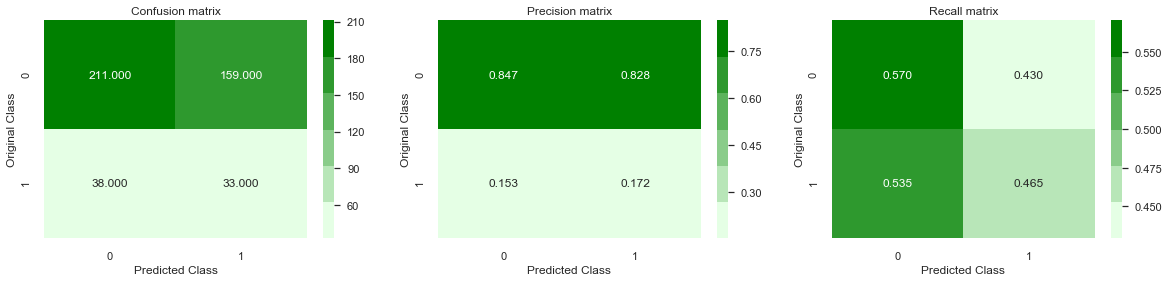

In [149]:
mn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

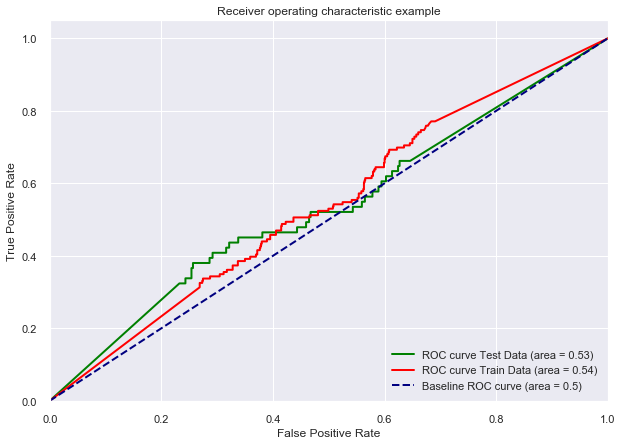

In [150]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 1. Logistic regression

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt

st=dt.now()
params = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=1230,class_weight='balanced',solver='liblinear')
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=10, scoring='roc_auc',
                                verbose=2,
                                n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished
C:\Users\Ranjeet\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Time taken to complete random search:  0:00:09.956868


In [39]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=37.27593720314938, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=1230, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l1', 'C': 37.27593720314938}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7947783984331122



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.322008


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.000998


---------------------
|      F1 Score      |
---------------------

    0.7301587301587301


---------------------
|      Accuracy      |
---------------------

    0.7301587301587301


---------------------
|      Recall        |
---------------------

    0.7464788732394366


---------------------
|      ROC AUC       |
---------------------

    0.8253901789113058


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       370
           1       0.34      0.75      0.47        71

    accuracy                           0.73       441
   macro avg       0.64      0.74      0.64       441
weighted avg       0.84      0.73      0.76       441



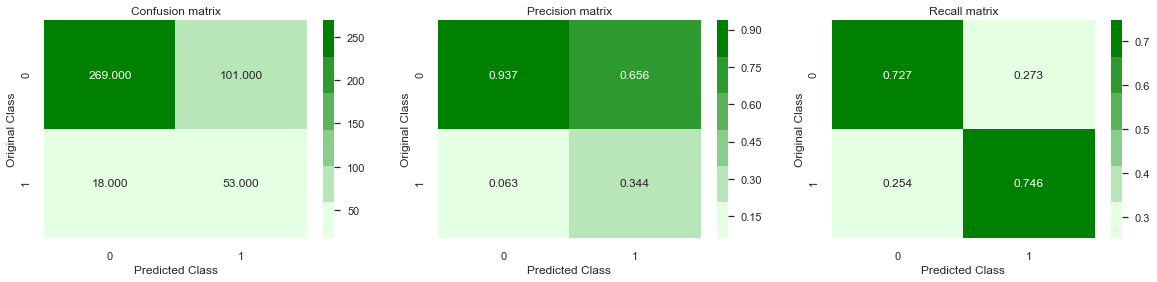

In [40]:
log_reg_grid_results, lg_trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

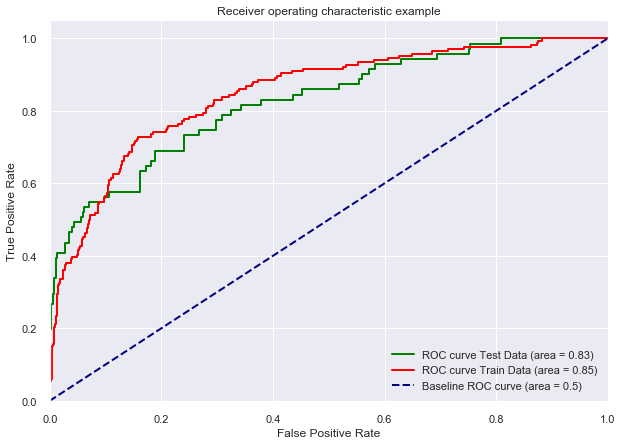

In [41]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(lg_trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 2. Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
st=dt.now()
params = {'max_depth': np.arange(2,30,2),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4]} 

model = DecisionTreeClassifier(random_state=1230,class_weight='balanced')
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=10, scoring='roc_auc',
                                verbose=1,
                                n_jobs=-1,
                                random_state=1230)

rsearch_cv.fit(X_train, y_train)
print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Time taken to complete random search:  0:00:00.788445


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [44]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1230, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.1, 'min_samples_leaf': 3, 'max_depth': 12, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate score

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.013992


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.003000


---------------------
|      F1 Score      |
---------------------

    0.6530612244897959


---------------------
|      Accuracy      |
---------------------

    0.6530612244897959


---------------------
|      Recall        |
---------------------

    0.6901408450704225


---------------------
|      ROC AUC       |
---------------------

    0.7209744956223829


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       370
           1       0.27      0.69      0.39        71

    accuracy                           0.65       441
   macro avg       0.59      0.67      0.57       441
weighted avg       0.81      0.65      0.70       441



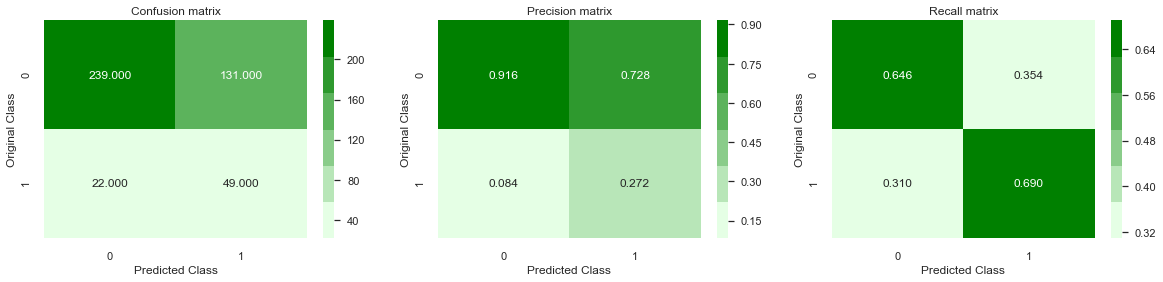

In [45]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

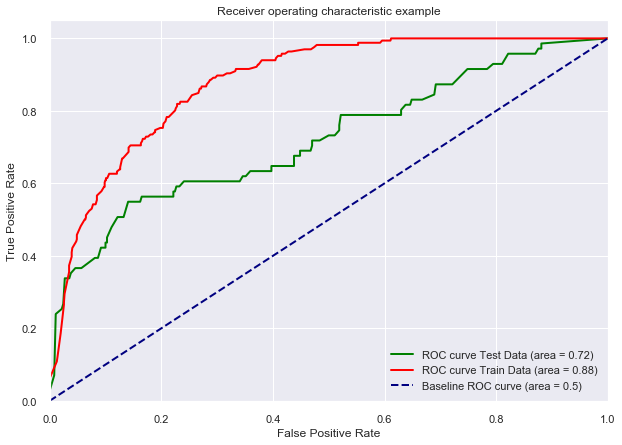

In [46]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 3. Random Forest

In [47]:
st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=1230,class_weight='balanced')
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.1s finished


Time taken to complete random search:  0:00:28.403990


In [48]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=10, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=25,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=60, n_jobs=None, oob_score=False,
                       random_state=1230, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 25, 'max_leaf_nodes': 10, 'max_depth': 10, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
|

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.255853


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.016066


---------------------
|      F1 Score      |
---------------------

    0.7777777777777778


---------------------
|      Accuracy      |
---------------------

    0.7777777777777778


---------------------
|      Recall        |
---------------------

    0.5915492957746479


---------------------
|      ROC AUC       |
---------------------

    0.7634183479253902


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       370
           1       0.38      0.59      0.46        71

    accuracy                           0.78       441
   macro avg       0.65      0.70      0.66       441
weighted avg       0.83      0.78      0.80       441



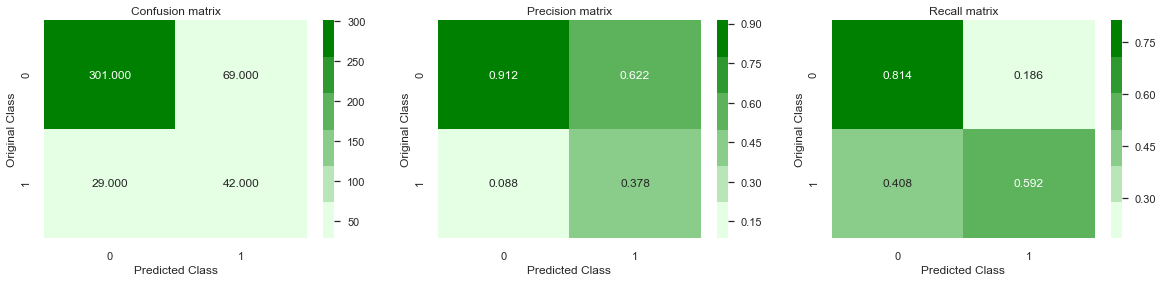

In [49]:
rf_grid_results, rf_trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

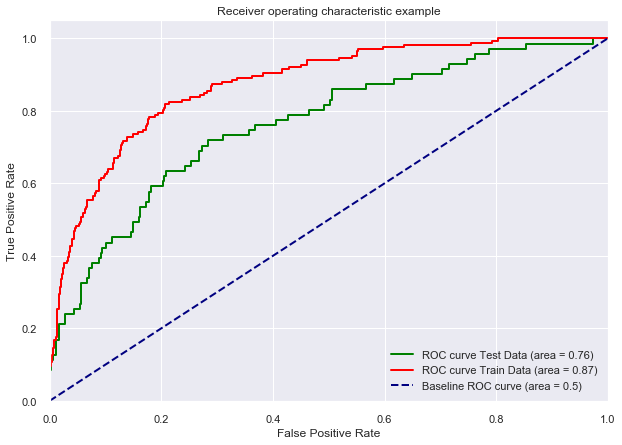

In [50]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(rf_trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

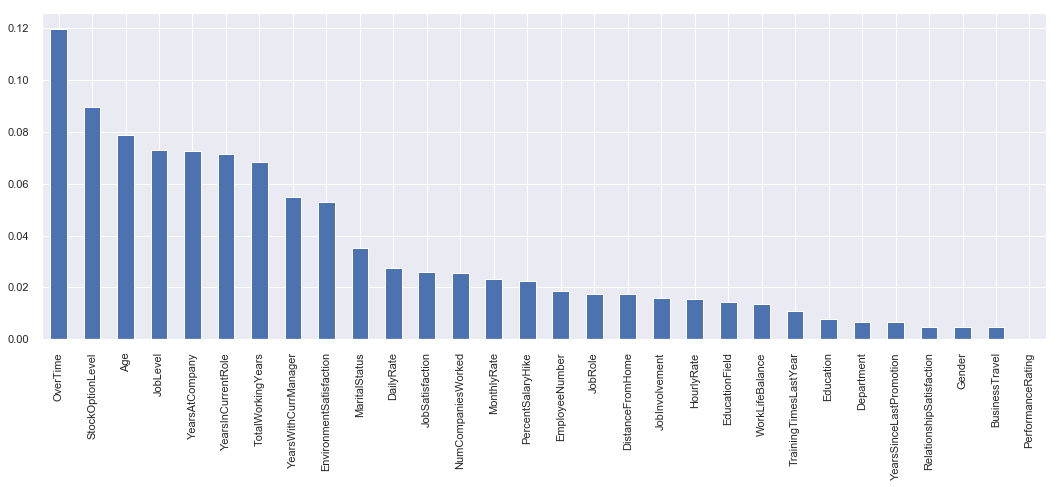

In [51]:
pd.Series(rf_trained_model.feature_importances_, 
         index=X.columns).sort_values(ascending=False).plot(kind='bar', figsize=(18,6));

#### 4. XGBoost

In [52]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9,11,13,15,17,20,25,50],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.4,0.5,0.55,0.7,1]}

model = XGBClassifier(random_state=1230)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=10, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


Time taken to complete random search:  0:02:38.809042


In [53]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1230,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 13, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.6}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 10

--------------------------
| 

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.585065


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.011994


---------------------
|      F1 Score      |
---------------------

    0.8684807256235828


---------------------
|      Accuracy      |
---------------------

    0.8684807256235828


---------------------
|      Recall        |
---------------------

    0.323943661971831


---------------------
|      ROC AUC       |
---------------------

    0.8316711077274458


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       370
           1       0.70      0.32      0.44        71

    accuracy                           0.87       441
   macro avg       0.79      0.65      0.68       441
weighted avg       0.85      0.87      0.85       441



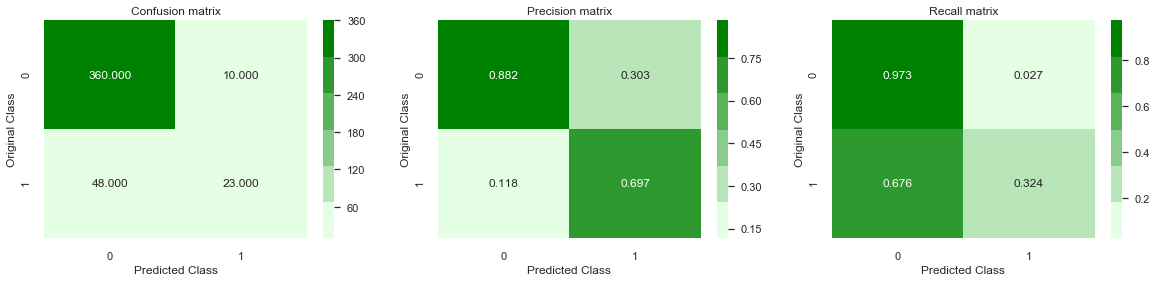

In [54]:
xg_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

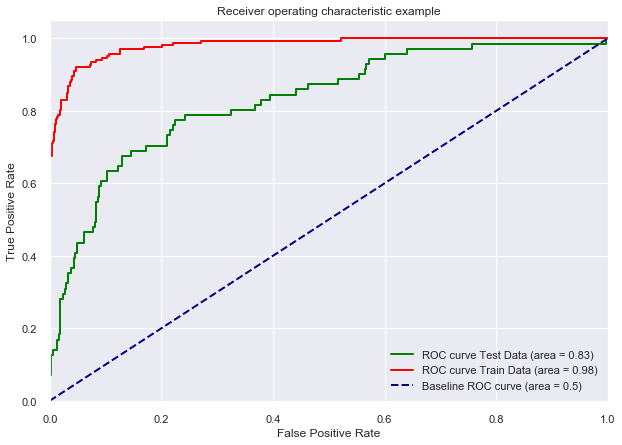

In [55]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 5. GBDT

In [56]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
st=dt.now()
params = {'learning_rate': [0.001,0.01,0.1],
                     'n_estimators': [100,200,300,400,500,600] ,
                       'max_depth': [3,4,5,6,7]} #C values used for cross validation

model = GradientBoostingClassifier( random_state=1230)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.9s finished


Time taken to complete random search:  0:00:30.446635


In [58]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='auto',
                           random_state=1230, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.1}

---------------------------------
|   No of CrossValidation s

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.414185


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00


---------------------
|      F1 Score      |
---------------------

    0.8594104308390023


---------------------
|      Accuracy      |
---------------------

    0.8594104308390023


---------------------
|      Recall        |
---------------------

    0.323943661971831


---------------------
|      ROC AUC       |
---------------------

    0.824971450323563


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.62      0.32      0.43        71

    accuracy                           0.86       441
   macro avg       0.75      0.64      0.67       441
weighted avg       0.84      0.86      0.84       441



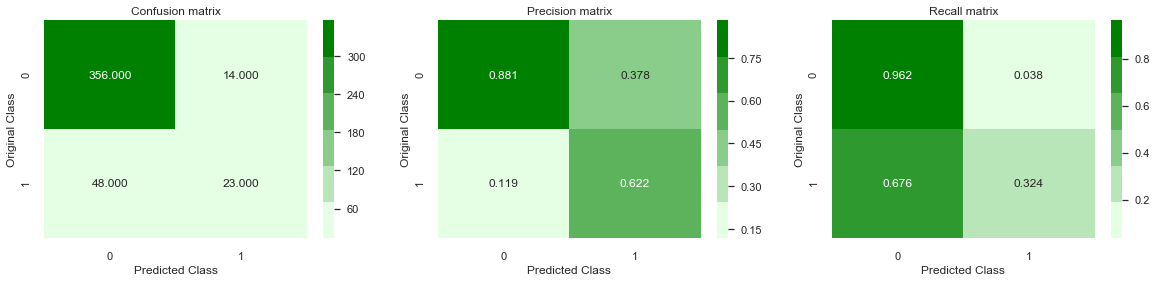

In [59]:
gbdt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

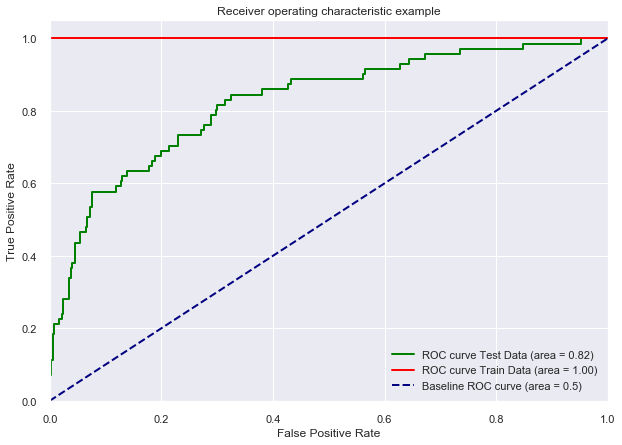

In [60]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 6.AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier


In [62]:
st=dt.now()
params = {'learning_rate': [0.001,0.01,0.1],
                     'n_estimators': [100,200,300,400,500,600] } #C values used for cross validation

model = AdaBoostClassifier( random_state=1230)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.5s finished


Time taken to complete random search:  0:00:18.461752


In [63]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=1230)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 300, 'learning_rate': 0.1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.826785829507955



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.893660


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.062495


---------------------
|      F1 Score      |
---------------------

    0.8684807256235828


---------------------
|      Accuracy      |
---------------------

    0.8684807256235828


---------------------
|      Recall        |
---------------------

    0.23943661971830985


---------------------
|      ROC AUC       |
---------------------

    0.8173201370384469


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       370
           1       0.81      0.24      0.37        71

    accuracy                           0.87       441
   macro avg       0.84      0.61      0.65       441
weighted avg       0.86      0.87      0.84       441



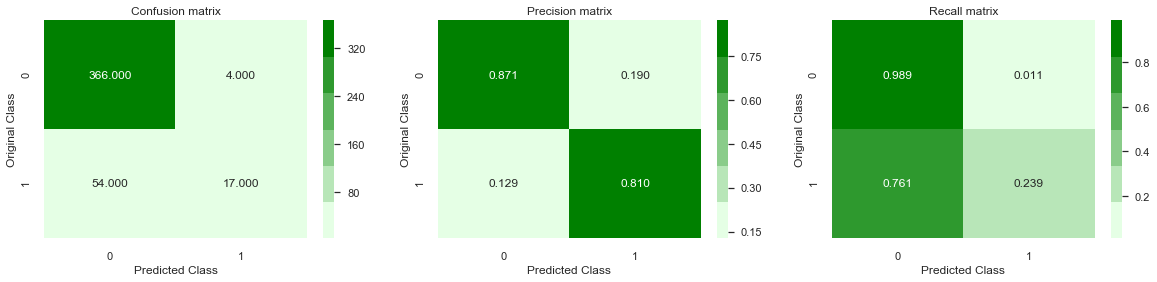

In [64]:
ada_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

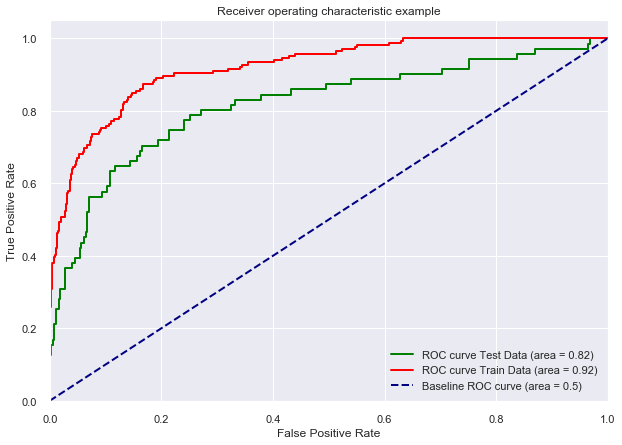

In [65]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 7.AdaBoosting + Random Forest

In [66]:
st=dt.now()
params = {'learning_rate': [0.001,0.01,0.1],
                     'n_estimators': [100,200,300,400,500,600] } #C values used for cross validation

model = AdaBoostClassifier( RandomForestClassifier(class_weight={0:1,1:5}))
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=2,n_jobs=-1,
                                random_state=1230)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished


Time taken to complete random search:  0:03:41.066990


In [67]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight={0: 1,
                                                                       1: 5},
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                       

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:10.455144


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.784160


---------------------
|      F1 Score      |
---------------------

    0.8458049886621314


---------------------
|      Accuracy      |
---------------------

    0.8458049886621315


---------------------
|      Recall        |
---------------------

    0.07042253521126761


---------------------
|      ROC AUC       |
---------------------

    0.7839360487247811


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.71      0.07      0.13        71

    accuracy                           0.85       441
   macro avg       0.78      0.53      0.52       441
weighted avg       0.83      0.85      0.79       441



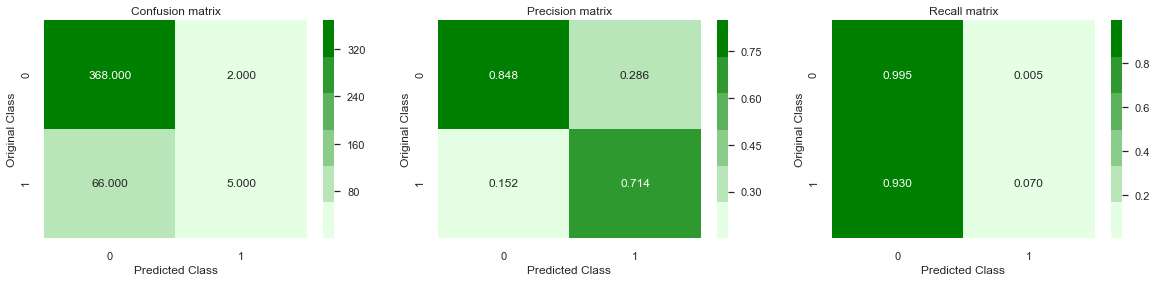

In [68]:
ada_rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

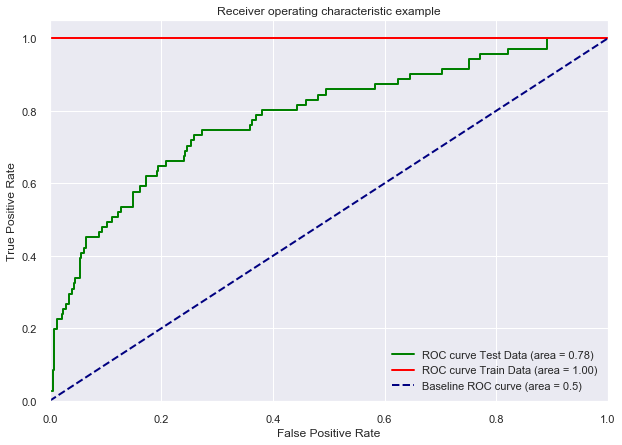

In [69]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

#### 8. ANN

In [70]:
import keras
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout
from keras import optimizers
from keras.metrics import binary_crossentropy
from keras.utils import to_categorical
from sklearn.metrics import roc_curve

Using TensorFlow backend.


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
#Initializing parameters
epochs = 20
batch_size = 256
first_layer_input = X_train.shape[1]
optim=optimizers.Adam(lr=0.001)

In [74]:
model=Sequential()
model.add(Dense(input_dim=first_layer_input,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [75]:
model.compile(optimizer=optim,loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 248       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [77]:
History=model.fit(X_train,y_train,validation_data=(X_test,y_test.ravel()),epochs=10,verbose=1)

Train on 1029 samples, validate on 441 samples
Epoch 1/10
1029/1029 [==============================] - 1s 1ms/step - loss: 0.9162 - acc: 0.2293 - val_loss: 0.7919 - val_acc: 0.3832
Epoch 2/10
1029/1029 [==============================] - 0s 51us/step - loss: 0.7458 - acc: 0.5024 - val_loss: 0.6737 - val_acc: 0.6372
Epoch 3/10
1029/1029 [==============================] - 0s 52us/step - loss: 0.6438 - acc: 0.6997 - val_loss: 0.5971 - val_acc: 0.7642
Epoch 4/10
1029/1029 [==============================] - 0s 67us/step - loss: 0.5694 - acc: 0.7940 - val_loss: 0.5396 - val_acc: 0.8277
Epoch 5/10
1029/1029 [==============================] - 0s 62us/step - loss: 0.5155 - acc: 0.8260 - val_loss: 0.4991 - val_acc: 0.8367
Epoch 6/10
1029/1029 [==============================] - 0s 67us/step - loss: 0.4799 - acc: 0.8358 - val_loss: 0.4752 - val_acc: 0.8390
Epoch 7/10
1029/1029 [==============================] - 0s 63us/step - loss: 0.4586 - acc: 0.8367 - val_loss: 0.4588 - val_acc: 0.8435
Epoch 8/1

In [78]:
model.evaluate(X_test,y_test)

441/441 [==============================] - 0s 41us/step


[0.4288279358762192, 0.8435374134792493]

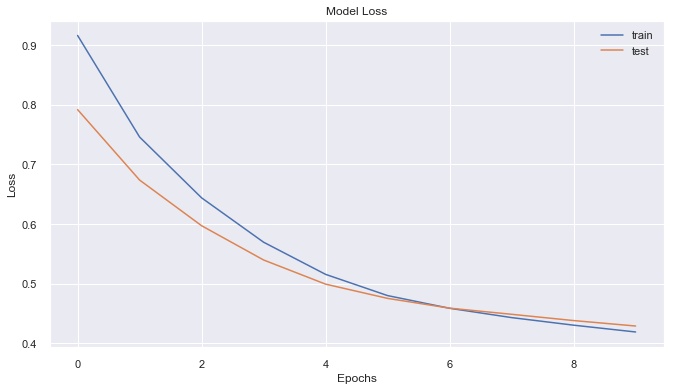

In [79]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

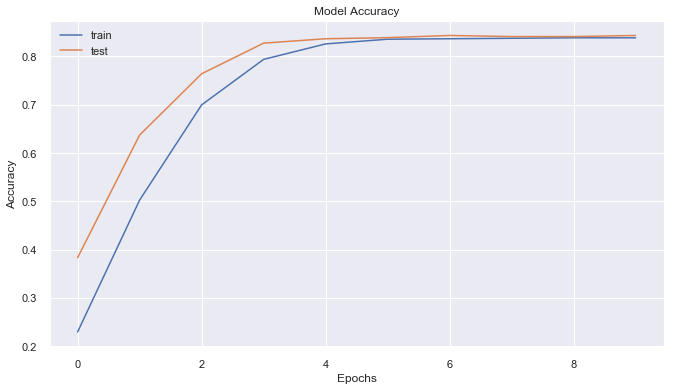

In [80]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

#### 9. Knn Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=1230)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.5s


Time taken to complete random search:  0:00:06.273305


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s finished


In [84]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'brute'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7421407700597773



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.002998


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.119930


---------------------
|      F1 Score      |
---------------------

    0.8435374149659864


---------------------
|      Accuracy      |
---------------------

    0.8435374149659864


---------------------
|      Recall        |
---------------------

    0.04225352112676056


---------------------
|      ROC AUC       |
---------------------

    0.7659497525694708


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.75      0.04      0.08        71

    accuracy                           0.84       441
   macro avg       0.80      0.52      0.50       441
weighted avg       0.83      0.84      0.78       441



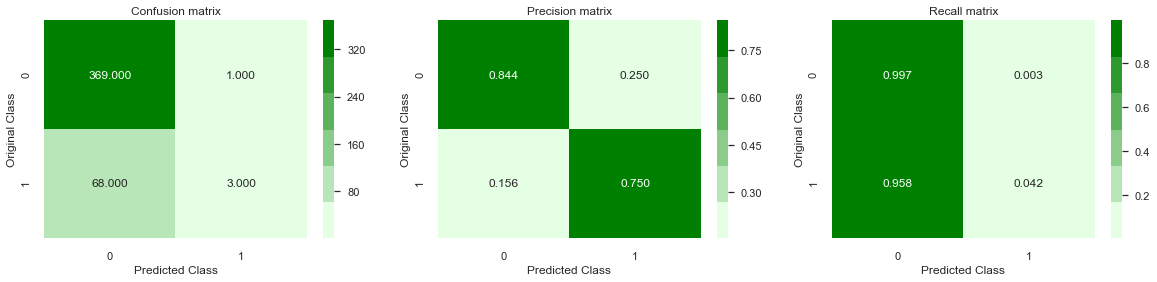

In [85]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

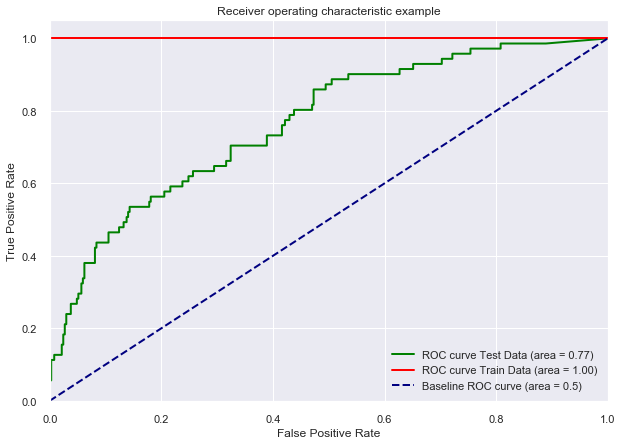

In [86]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### Conclusion:-

In [137]:
from prettytable import PrettyTable
model=['Logistic Regression','Decision Tree','Random Forest','XgBoost','GBDT','AdaBoost','AdaBoost+ Random forest','KNN','Naive Bayes']
Train_AUC = [0.85, 0.88, 0.87, 0.98, 1, 0.92, 1 ,1,0.54]
Test_AUC = [0.83, 0.72, 0.76, 0.83, 0.82, 0.82, 0.78, 0.77,0.53]
F1_Score = [0.73, 0.65, 0.77, 0.86, 0.85, 0.86, 0.84, 0.84,0.55]

In [138]:
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("Model",model)
ptable.add_column("AUC(Train)",Train_AUC)
ptable.add_column("AUC(Test)",Test_AUC)
ptable.add_column("F1_Score",F1_Score)
# Printing the Table
print(ptable)

+-------------------------+------------+-----------+----------+
|          Model          | AUC(Train) | AUC(Test) | F1_Score |
+-------------------------+------------+-----------+----------+
|   Logistic Regression   |    0.85    |    0.83   |   0.73   |
|      Decision Tree      |    0.88    |    0.72   |   0.65   |
|      Random Forest      |    0.87    |    0.76   |   0.77   |
|         XgBoost         |    0.98    |    0.83   |   0.86   |
|           GBDT          |     1      |    0.82   |   0.85   |
|         AdaBoost        |    0.92    |    0.82   |   0.86   |
| AdaBoost+ Random forest |     1      |    0.78   |   0.84   |
|           KNN           |     1      |    0.77   |   0.84   |
|       Naive Bayes       |    0.54    |    0.53   |   0.55   |
+-------------------------+------------+-----------+----------+


##### Logistic Regression is the best with AUC of .83